
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# Sprint 7: Proyecto, analisis exploratorio y prueba de hipótesis de servicio de taxis en la ciudad de Chicago

-   [Introducción](#introducción)
-   [Importar Bibliotecas](#impotar-bibliotecas)
-   [Cargar datos](#cargar-datos)
-   [Análisis de los datos](#analisis-de-los-datos)
-   [Gráficas](#gráficas)
-   [Prueba de hipótesis](#prueba-da-hipótesis)
-   [Conclusiones](#conclusiones)

## Introducción

<b>Descripción del proyecto:</b>

Se hará un análisis de los datos obtenidos de las consultas previas de los datos de la compañía Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

<b>Descripción de los datos:</b>

Además de los datos que recuperados, ahora se tienen los siguientes archivos CSV:

<b>project_sql_result_01.csv</b>. Contiene los siguientes datos:

-   company_name: nombre de la empresa de taxis
-   trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

<b>project_sql_result_04.csv</b>. Contiene los siguientes datos:

-   dropoff_location_name: barrios de Chicago donde finalizaron los viajes
-   average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

<b>project_sql_result_07.csv</b>. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

-   start_ts: fecha y hora de recogida
-   weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
-   duration_seconds: duración del viaje en segundos

Se hará una prueba para la hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>


Ulises, excelente trabajo agregando una introducción al proyecto donde se especifiquen claramente los objetivos y se explique el propósito del mismo. Es esencial hacer esto para establecer las bases del proyecto y aclarar lo que buscamos alcanzar. Con la introducción, queda de manera clarar el análisis que desarrollaremos en el proyecto y cómo lo pretendemos abordar.</div>

## Impotar bibliotecas

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import math as mt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import re

## Cargar datos

In [2]:
# Cargando la database en formato csv
company = pd.read_csv('moved_project_sql_result_01.csv')
chicago = pd.read_csv('moved_project_sql_result_04.csv')
route = pd.read_csv('moved_project_sql_result_07.csv')
#Imprimiendo la información general del dataframe

In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Analisis de los datos

Se imprime una muestra de los datos del dataframe `company`, donde se aprecia que algunos de los nombres de las compañías no se recuperaron adecuadamente ya que contienen lo que parece ser números de llaves, ya sean primarias o foráneas, por lo que se eliminarán, junto con los espacios sobrantes previos al nombre:

In [6]:
print(company.sample(10, random_state= 1234))

                       company_name  trips_amount
22             Chicago Independents          1296
32                   Leonard Cab Co           147
33                 Metro Jet Taxi A           146
8         Star North Management LLC          7455
6                      City Service          8448
56    5997 - 65283 AW Services Inc.            12
40      6574 - Babylon Express Inc.            31
20                     Checker Taxi          1486
4   Taxi Affiliation Service Yellow          9299
21                  American United          1404


Se crea una función usando expresiones regulares para obtener solo el texto de los nombres de las compañías, y posterioremente, fuera de la función, se usa el método strip para eliminar los espacios sobrentes previos al nombre de la compañía de taxis.

In [7]:
# Función para eliminar números de una cadena
def remove_numbers(text):
    return re.sub(r'[\d-]+', '', text)

In [8]:
clear_names = []
for name in company['company_name']:
    clear_names.append(remove_numbers(name).lstrip())

# print(clear_names)
company['company_name'] = clear_names
print(company.sample(10, random_state= 1234))

                       company_name  trips_amount
22             Chicago Independents          1296
32                   Leonard Cab Co           147
33                 Metro Jet Taxi A           146
8         Star North Management LLC          7455
6                      City Service          8448
56                 AW Services Inc.            12
40             Babylon Express Inc.            31
20                     Checker Taxi          1486
4   Taxi Affiliation Service Yellow          9299
21                  American United          1404


In [9]:
print(chicago.sample(10, random_state= 1234))

   dropoff_location_name  average_trips
40              Bucktown      74.300000
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
88                 Undef       3.800000
63         Andersonville      16.866667
61        Grand Crossing      22.600000
35          Norwood Park      95.233333
79           Fuller Park       8.166667
27              Avondale     208.233333
54        North Lawndale      32.166667


Dado que los datos ya están ordenados de forma descendente, no es necesario ordenarlos, ya que ordenados de mayor a menor respecto a la cantidad de viajes promedio, solo se imprimen los primeros 10 puestos.

In [10]:
# print(chicago.sort_values(by='average_trips', ascending=False).head(10))
print(chicago.head(10))

  dropoff_location_name  average_trips
0                  Loop   10727.466670
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Se cambia el tipo de dato `object` de la columna `start_ts` a formto `ISO8601` usando la función `pd.to_datetime`.

In [11]:
route['start_ts'] = pd.to_datetime(route['start_ts'], format= 'ISO8601')
print(route.sample(10, random_state= 1234))

               start_ts weather_conditions  duration_seconds
397 2017-11-04 17:00:00                Bad            2340.0
688 2017-11-11 16:00:00               Good            2640.0
899 2017-11-04 14:00:00               Good            3480.0
639 2017-11-25 16:00:00               Good            2091.0
751 2017-11-11 06:00:00               Good            1586.0
812 2017-11-18 12:00:00                Bad            2467.0
652 2017-11-04 17:00:00                Bad            2340.0
496 2017-11-18 16:00:00                Bad            2760.0
759 2017-11-11 16:00:00               Good            2040.0
576 2017-11-04 18:00:00                Bad            2280.0


In [12]:
#Buscando duplicados
route[route.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 62 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            197 non-null    datetime64[ns]
 1   weather_conditions  197 non-null    object        
 2   duration_seconds    197 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.2+ KB


In [13]:
#Elliminando duplicados
route = route.drop_duplicates()
route.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para estos análisis iniciales te recomiendo verificar si contamos con registros duplicados</div>



<div class="alert alert-block alert-info">
<b>Corrección:</b> Se gestionan las filas duplicadas. <a class="tocSkip"></a>

## Gráficas

In [14]:
# print(company.sort_values(by='trips_amount', ascending=False).head(10))

In [15]:
print(company.head(10))

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


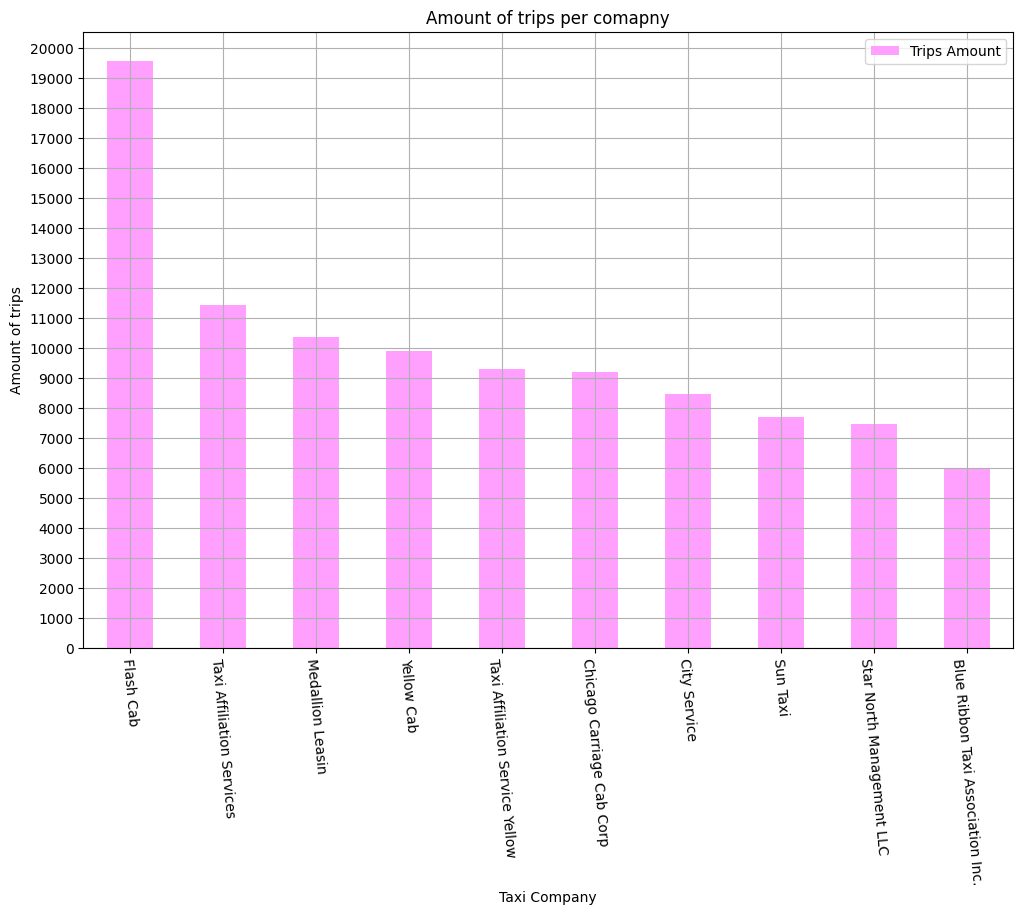

In [16]:
company.head(10).plot(
    x='company_name',
    y= 'trips_amount',
    kind='bar',
    figsize=[12,8],
    grid=True,
    color = '#FFA0FF',
    yticks = np.linspace(0, 20000, 21),
    title = 'Amount of trips per comapny',
    ylabel = 'Amount of trips',
    xlabel = 'Taxi Company'
    )

plt.legend(['Trips Amount'])
plt.xticks(rotation= -85)
plt.show()

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la gráfica para visualizar los resultados. Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10.</div>

<div class="alert alert-block alert-info">
<b>Corrección:</b> Se redujó el número de compañias mostradas en la gráfica. <a class="tocSkip"></a>

Como se puede apreciar en la figura anterior, la compañía `Flash Cab` es el lider de viajes, ya que, tomando en cuenta la segunda compañía con más viajes, `Flash Cab` tiene, aproximadamente, un 74% más viajes. Esto muestra su fuerte presencia en el mercado de taxis, sin embargo, su impacto es menor al 50% de los viajes totales de los días sábado.

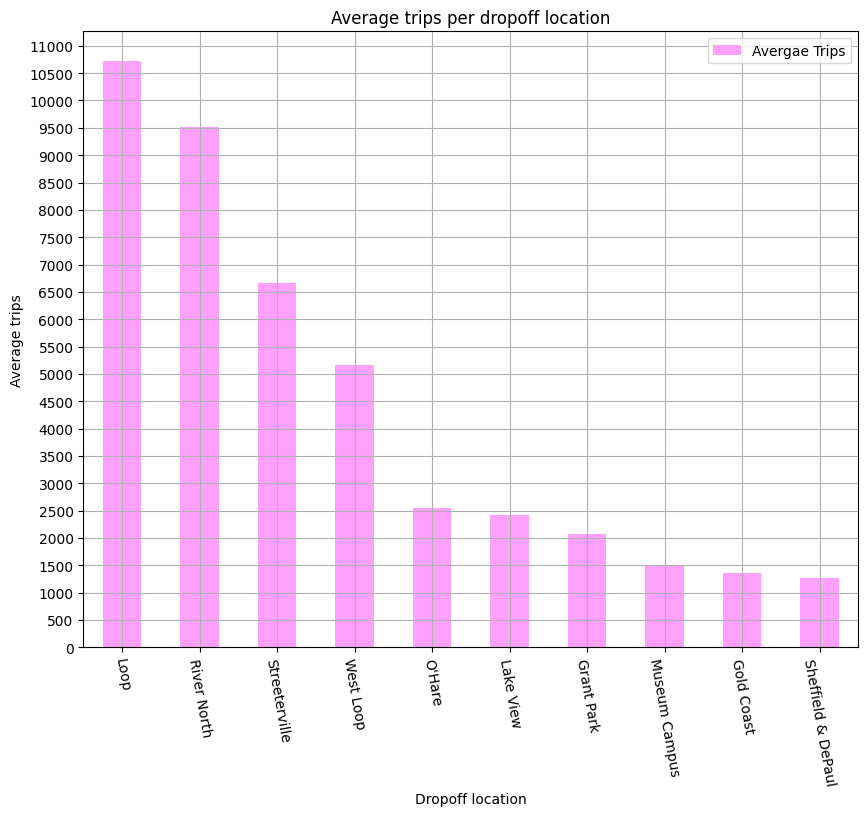

In [17]:
chicago.head(10).plot(
    x='dropoff_location_name',
    y= 'average_trips',
    kind='bar',
    figsize=[10,8],
    grid=True,
    color = '#FFA0FF',
    yticks = np.linspace(0, 11000, 23),
    title = 'Average trips per dropoff location',
    ylabel = 'Average trips',
    xlabel = 'Dropoff location'
    )

plt.legend(['Avergae Trips'])
plt.xticks(rotation= -80)
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

En la figura anterior se muestran la cantidad de viajes terminados en áreas en concreto. Donde se logra apreciar que tanto `Loop` como `River North` son las zonas de destino de gran parte de los viajes, representanto aproximadamente un 46% de los viajes como destino final de los días sábado.

## Prueba da hipótesis

In [18]:
route.info()
print(route.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB
             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0
5 2017-11-11 04:00:00               Good            1320.0
6 2017-11-04 16:00:00                Bad            2969.0
7 2017-11-18 11:00:00               Good            2280.0
8 2017-11-11 14:0

Para hacer la prueba de hipótesis, eliminaremos los outliers y haremos una prueva de Levene para comprobar la igualdad de variazas.

In [19]:
def erase_outliers (data):

    q1 = np.quantile(data, 0.25)
    # finding the 3rd quartile
    q3 = np.quantile(data, 0.75)
    med = np.median(data)
 
    # finding the iqr region
    iqr = q3-q1
 
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)  
    
    clean_data = data[(data >= lower_bound) | (data <= upper_bound)]

    return clean_data#, iqr, q1, q3, med

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante:</b> La función erase_outliers fue agregada en la versión 1 del proyecto para eliminar los datos atípicos previos a la prueba de hipótesis. <a class="tocSkip"></a>

In [20]:
def prueba_hipotesis(sample_1, sample_2, alpha, prove):
    

    sample_1 = erase_outliers(sample_1)
    sample_2 = erase_outliers(sample_2)

    levene_res = st.levene(sample_1, sample_2)

    results = st.ttest_ind(sample_1, sample_2, equal_var= (levene_res.pvalue > 0.05)) # realizar una prueba
    
    # print('valor p: ', results.pvalue) # extraer el valor p

    if prove == 1: # Para prueba de igualdad de medias
        if results.pvalue < alpha: # comparar el valor p con el umbral
            print("Rechazamos la hipótesis nula")
        else:
            print("No podemos rechazar la hipótesis nula")		
    else: # Para prueba de desigualdad de medias
        if results.pvalue > alpha: # comparar el valor p con el umbral
            print("Rechazamos la hipótesis nula")
        else:
            print("No podemos rechazar la hipótesis nula")	
    
    return results

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo!! Es importante mostrar si se cumplen los supuestos cuandor realizamos pruebas de hipótesis.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Realizaste de manera perfecta la prueba de hipótesis. 
</div>

Ahora separamos el dataframe en dos, dependiendo de si el día fue malo o bueno:

In [21]:
#Separamos el dataframe en dos diferentes para hacer la prueba de hipótesis

good_day = route[route['weather_conditions'] == 'Good']['duration_seconds']
bad_day = route[route['weather_conditions'] == 'Bad']['duration_seconds']

# print(good_day)
# print(bad_day)

A continuación se hará una prueba de la siguiente hipótesis:

<b> "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". </b>

Dada la hipótesis, se presenta una comparación de medias, en este caso de diferencia de medias. Por lo que se proponen las siguientes hipótesis nula y alternativa:

*   <b> Hipótesis nula:</b> La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare de los días lluviosos y los días sin lluvia son diferentes.

*   <b> Hipótesis alternativa:</b> La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare de los días lluviosos y los días sin lluvia son similares.

In [22]:
#Para hacer la prueba de hipótesis se llama a la función 'prueba_hipotesis' que sigue la siguiente estructura:
#   prueba_hipotesis(Sample 1 Type : Series, Sample 2 Type : Series, alpha value, equal means = 1 or different means = 0)
prueba_hipotesis(bad_day, good_day, 0.5, 0)

No podemos rechazar la hipótesis nula


TtestResult(statistic=5.427957689754561, pvalue=7.397770692813658e-08, df=869.0)

## Conclusiones

El análisis de los datos de viajes en taxis revela que Flash Cab fue la compañía más utilizada, representando una parte significativa de los aproximadamente 43,500 viajes estudiados. Esta preferencia por Flash Cab podría atribuirse a varios factores, como la disponibilidad de una flota más grande, que permite una mayor cobertura y tiempos de espera reducidos para los clientes. Además, los precios competitivos podrían haber atraído a una amplia base de usuarios que buscan opciones de transporte asequibles. El servicio al cliente eficiente, caracterizado por conductores amables y puntuales, también juega un papel crucial en la satisfacción del cliente, fomentando así la lealtad y la repetición del uso.

La mayor presencia de Flash Cab en áreas de alta demanda como Loop y River North es otro factor determinante en su popularidad. Estas zonas, conocidas por su actividad comercial y turística, generan una gran cantidad de viajes diarios, proporcionando a Flash Cab una ventaja competitiva significativa. La visibilidad y accesibilidad de los taxis de Flash Cab en estas áreas probablemente han facilitado la elección de esta compañía por parte de los pasajeros.

Además, la fidelidad de los clientes podría estar influenciada por programas de lealtad o recompensas ofrecidos por Flash Cab, incentivando a los usuarios a elegir esta compañía repetidamente.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:


* Realizar un análisis de duplicados
    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
    
*  Profundizar en los resultados intermedios y en la conclusión final.
    
</div>